# CHEM277B Homework 1
## Trevor Oldham
## January 25 2023
## UC Berkeley CoC

### Helping Functions


In [1]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

In [2]:
%matplotlib notebook
def draw_path(func,path,x_min=-2,x_max=2,y_min=-2,y_max=2):
    a=np.linspace(x_min,x_max,100)
    b=np.linspace(y_min,y_max,100)
    x,y=np.meshgrid(a,b)
    z=func((x,y))
    fig,ax=plt.subplots()
    my_contour=ax.contour(x,y,z,50)
    plt.colorbar(my_contour)
    ax.plot(path[:,0],path[:,1])

### Problem 1

### (A)
For step two we place the new point e at the bisector of the interval [a, b]. We choose this interval instead of [b,d] because [a,b] is larger than [b,d] which means the minimum is most likely to be there, as well as the fact that we reduce the search space by a larger proportion when we bisect the larger interval.

### (B)
We evaluate f(e) to find that it is less than f(b) which means the new interval containing the minimum is [a, e, b]. This new interval has a size of 0.5 units, which is a 1/3 reduction of the interval [a, b, d] which is 0.75.

### (C)
From the new interval [a, e, b] we can choose to place point f at the bisection of either subinterval because they are the same size. I will choose to place point f at the bisection of [e, b]. Then evaluate f(f) to find that f(f) > f(e), so the new interval containing the minimum is [a, e, f].

### (D)

A tree diagram is provided which explains the pattern that arrises from the bisection method. In the worst case the interval is reduced to 3/4 the previous interval, and in the best case it is reduced to 1/2. The middle case is when it is reduced to 2/3 the size.

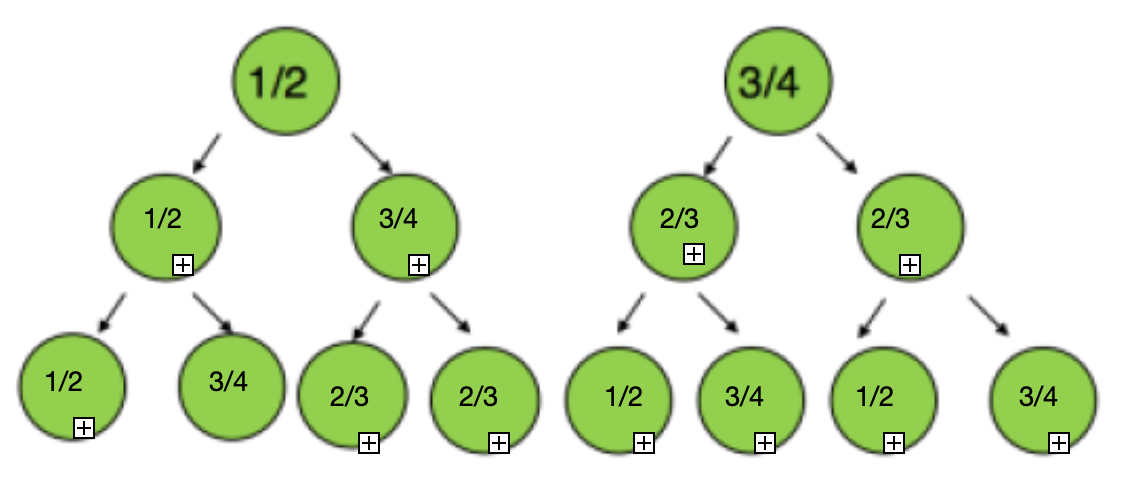


### (E)

The average size of the intervals at step 2 is 0.6425. The average size of the intervals at step 3 is 0.6354.

### (F)

A table is provided to show the size of the interval for each step from 1 to 3, and it demonstrates that by step three the Golden Section has reduced the search space to 23.6% of the original, whereas the Bisection average case would after step three would be 25.5% of the original. The Bisection method reduces the search space to either one of three values, 1/2, 3/4, or 2/3 and the average size of the interval at each step is roughly two thirds the value of the previous interval. The Golden section reduces the search interval to 0.618 each time, which is slightly better than the average cases found using Bisection.


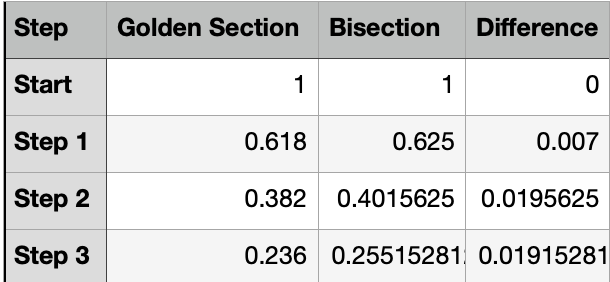

### Problem 2

In [3]:
from pylab import *
import numpy.linalg as LA

### Defining Function and Derivative

In [4]:
def function(arr):
    return arr[0]**4 - arr[0]**2 + arr[1]**2 + 2*arr[0]*arr[1] -2

In [5]:
def first_derivative(arr):
    grad = np.array([4*arr[0]**3 - 2*arr[0] + 2*arr[1], 2*arr[1] + 2*arr[0]])
    return grad

### (A)

Demonstrating one step of the steepest descent algorithm to check against debugging output:

In [6]:
@timeit
def steepest_descent_step(func,first_derivate,starting_point,stepsize,tol):
    # evaluate the gradient at starting point
    
    deriv = first_derivate(starting_point)
    
    count=0
    visited=[]
    
           
    new_point = starting_point - deriv*stepsize
    visited.append(new_point)
    

    # return the results
    return {"x":starting_point,"evaluation":func(new_point), "path":np.asarray(visited)}

In [7]:
start = np.array([1.5, 1.5])
stepsize = 0.1
tol = 1e-5
print("Function evaluation at starting point" , function(start))

steepest_descent_step(function, first_derivative, start, stepsize, tol)

Function evaluation at starting point 7.5625
func:'steepest_descent_step' took: 0.0000 sec


{'x': array([1.5, 1.5]),
 'evaluation': -0.9419937500000004,
 'path': array([[0.15, 0.9 ]])}

The output is as expected and the function evaluates to -0.94199 at the new point which is lower than the function evaluated at the starting point which is 7.5625. This means that the path was followed toward the minimum and the step was a good one. We can increase the value of the stepsize by a factor of 1.2 and iterate again. 

## (B)

Here is the algorithm to iterate over the path using steepest descent.

In [8]:
@timeit
def steepest_descent(func,first_derivate,starting_point,stepsize,tol):
    # evaluate the gradient at starting point
    
    deriv = first_derivate(starting_point)
    
    count=0
    visited=[]
    
    while LA.norm(deriv) > tol and count < 1e6:
        # calculate new point position
       
        deriv = first_derivative(starting_point)
        new_point = starting_point - deriv*stepsize
        
        
        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = stepsize*1.2
            starting_point = new_point
            visited.append(new_point)
            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            stepsize = stepsize*0.5
            
        count+=1
    # return the results
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited), "count":count} , np.asarray(visited)

In [9]:
start = np.array([1.5, 1.5])
stepsize = 0.1
tol = 1e-5
print("Function evaluation at starting point" , function(start))

out , path = steepest_descent(function, first_derivative, start, stepsize, tol)
print(out)

Function evaluation at starting point 7.5625
func:'steepest_descent' took: 0.0026 sec
{'x': array([-0.99999972,  0.99999691]), 'evaluation': -2.999999999991799, 'path': array([[ 0.15      ,  0.9       ],
       [-0.03162   ,  0.648     ],
       [-0.22733235,  0.47048256],
       [-0.4603766 ,  0.38644985],
       [-0.73063964,  0.41710875],
       [-0.91361447,  0.57314178],
       [-0.89067253,  0.77647099],
       [-0.98168777,  0.81739147],
       [-0.94167921,  0.88803587],
       [-1.0240441 ,  0.91571465],
       [-0.95964931,  0.94925202],
       [-1.01216804,  0.95311466],
       [-0.98795692,  0.96627781],
       [-0.99481157,  0.9720766 ],
       [-0.99412388,  0.97937406],
       [-0.99741632,  0.98505533],
       [-0.99646125,  0.99076871],
       [-1.00111334,  0.9939261 ],
       [-0.99723697,  0.99631795],
       [-1.00126535,  0.99668496],
       [-0.99895278,  0.99778247],
       [-0.99981882,  0.99811897],
       [-0.99948229,  0.99870549],
       [-1.00001741,  0.99

The algorithm terminates having found the correct minimum as described in the debugging output, within a certain tolerance of error. However, the count is 52 steps to converge, whereas the example output suggests that it should converge in 41 steps. By counting the points visited in the array "Path" it becomes clear that 42 points were visited in the path to convergence. The amount of time spent was around the same value to converge. Because this algorithm is the Adaptive Steepest Descent, the paths followed are not orthogonal to the previous one, which would be the case if we used a line search to find the minimum along the gradient being followed before calculating the gradient again for the next step. In this case the path always follows the negative gradient from the current point.

<IPython.core.display.Javascript object>


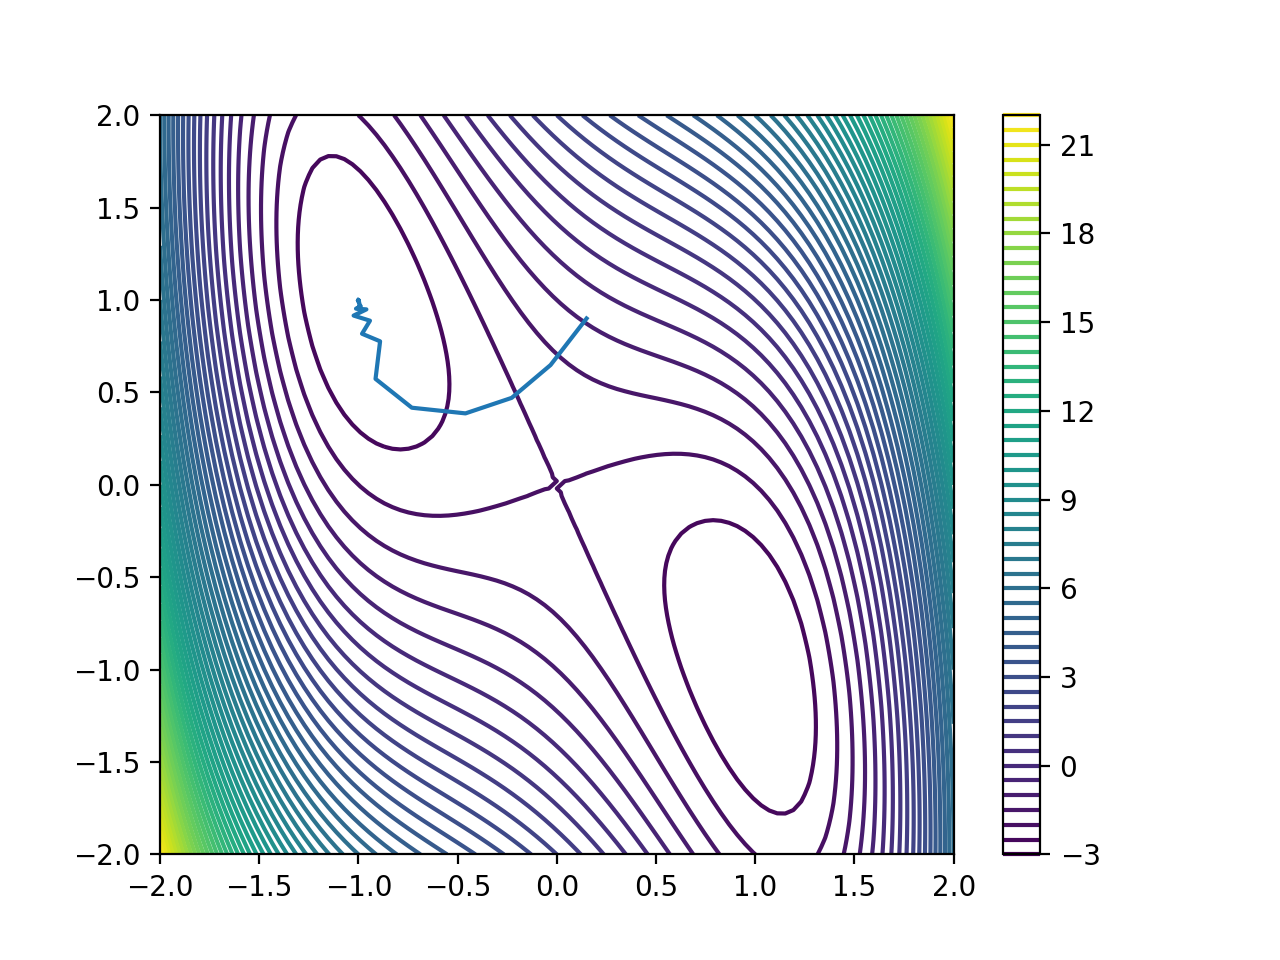

In [10]:
draw_path(function, path)

### (C)

We will use SciPy to demonstrate the minimization of the same function using Conjugate Gradient and the BFGS algorithm. 

In [11]:
import scipy

In [12]:
@timeit
def CG(function, start):
    return scipy.optimize.minimize(function, start, method="CG")

In [13]:
CG(function, start)

func:'CG' took: 0.4596 sec


     fun: -2.99999999999959
     jac: array([ 2.08616257e-07, -1.10268593e-06])
 message: 'Optimization terminated successfully.'
    nfev: 78
     nit: 9
    njev: 26
  status: 0
 success: True
       x: array([-0.99999984,  0.99999929])

In [14]:
@timeit
def BFGS(function, start):
    return scipy.optimize.minimize(function, start, method="BFGS")

In [15]:
BFGS(function, start)

func:'BFGS' took: 0.0049 sec


      fun: -2.9999999999998255
 hess_inv: array([[ 0.12457729, -0.12457659],
       [-0.12457659,  0.62569812]])
      jac: array([-1.63912773e-06, -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 0.99999979, -0.9999998 ])

We see that the CG algorithm terminates at the correct minimum after 9 iterations and the BFGS algorithm also terminates at the minimum in 7 iterations. This is a major speedup compared to the adaptive steepest descent algorithm written above. The CG algorithm is comparable in time elapsed in the SD algorithm, but BFGS is faster by a factor of 2 or 3. This algorithm would be more efficient to use than the adaptive steepest descent, and I assume that it also works with non-homogeneous functions as well.

## Problem 3

In [16]:
def RBF(x):
    return (1 - x[0])**2 + 10*(x[1] - x[0]**2)**2

def RBF_grad(x):
    return np.array([(-2*(1-x[0]) + 10*2*(-2)*(x[1] - x[0]**2)), 2*10*(x[1] - x[0]**2)])

### (A)

In [17]:
starting_point = np.array([-0.5, 1.5])
stepsize = 0.1
tol = 1e-5

out, path = steepest_descent(RBF, RBF_grad, starting_point, stepsize, tol)
print(out)

func:'steepest_descent' took: 16.1777 sec
{'x': array([-0.99999905,  1.00003234]), 'evaluation': 3.9999962214021285, 'path': array([[-0.85      ,  1.3       ],
       [-1.07122   ,  1.192     ],
       [-1.01498621,  1.15721536],
       [-1.04295564,  1.10806096],
       [-0.99404071,  1.08106048],
       [-1.00780663,  1.07023383],
       [-1.01010838,  1.06557367],
       [-1.01139981,  1.06060511],
       [-1.01170331,  1.05531577],
       [-1.01118401,  1.04969   ],
       [-1.01010303,  1.04372953],
       [-1.00872844,  1.03748334],
       [-1.00725342,  1.0310738 ],
       [-1.00577966,  1.02470225],
       [-1.00436836,  1.01862849],
       [-1.00308651,  1.01313583],
       [-1.0019985 ,  1.00849093],
       [-1.00115234,  1.00488989],
       [-1.00056676,  1.00240224],
       [-1.00022052,  1.00093624],
       [-1.00006078,  1.00025027],
       [-0.99999905,  1.00003234]]), 'count': 1000000}


The steepest_descent() algorithm is a poor choice for this particular function, it is evident that a minimum is found at (-1, 1) with a function evaluation at 3.9999, however the chart of the function suggests that the minimum should be at (1, 1), so we cannot be sure that the SD algorithm has found the minimum. The algorithm terminates after the tolerance for number of steps is reached, and count is equal to 1e-5. The path array shows 22 points visited which means that the steps chosen tend to be a bad step, in which case the stepsize is adjusted and the iteration starts again. 

### (B)

In [18]:
@timeit
def stochastic_gradient_descent(func,first_derivate,starting_point,stepsize,tol=1e-5,stochastic_injection=1):
    '''stochastic_injection: controls the magnitude of stochasticity (multiplied with stochastic_deriv)
        0 for no stochasticity, equivalent to SD. 
        Use 1 in this homework to run SGD
    '''

    deriv = first_derivate(starting_point);
    count=0
    visited=[]
    while LA.norm(deriv) > tol and count < 1e5:
        
        deriv = first_derivate(starting_point)
        
        if stochastic_injection>0:
            # formulate a stochastic_deriv that is the same norm as your gradient
            rand_vec = np.array([1 - 2 * np.random.random(), 1 - 2 * np.random.random()])
            scale_factor = LA.norm(deriv) / LA.norm(rand_vec)
            stochastic_deriv = rand_vec*scale_factor
            
        else:
            stochastic_deriv=np.zeros(len(starting_point))
            
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        # calculate new point position
        new_point = starting_point + stepsize*direction
        
        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = stepsize*1.2
            starting_point = new_point
            visited.append(new_point)
            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            stepsize = stepsize*0.5
            
        count+=1
    return {"x":starting_point,"evaluation":func(starting_point),"count":count,"path":np.asarray(visited)}, np.asarray(visited)

In [19]:
starting_point = np.array([-0.5, 1.5])
stepsize = 0.1
tol = 1e-5

out, path = stochastic_gradient_descent(RBF, RBF_grad, starting_point, stepsize, tol)
print(out)

func:'stochastic_gradient_descent' took: 0.1028 sec
{'x': array([0.99998919, 0.99997782]), 'evaluation': 1.2004362144308237e-10, 'count': 2102, 'path': array([[-0.5812    ,  1.28591551],
       [-0.60588088,  1.2248014 ],
       [ 0.81193158,  0.93104429],
       ...,
       [ 0.99998899,  0.99997771],
       [ 0.99998906,  0.99997765],
       [ 0.99998919,  0.99997782]])}


<IPython.core.display.Javascript object>


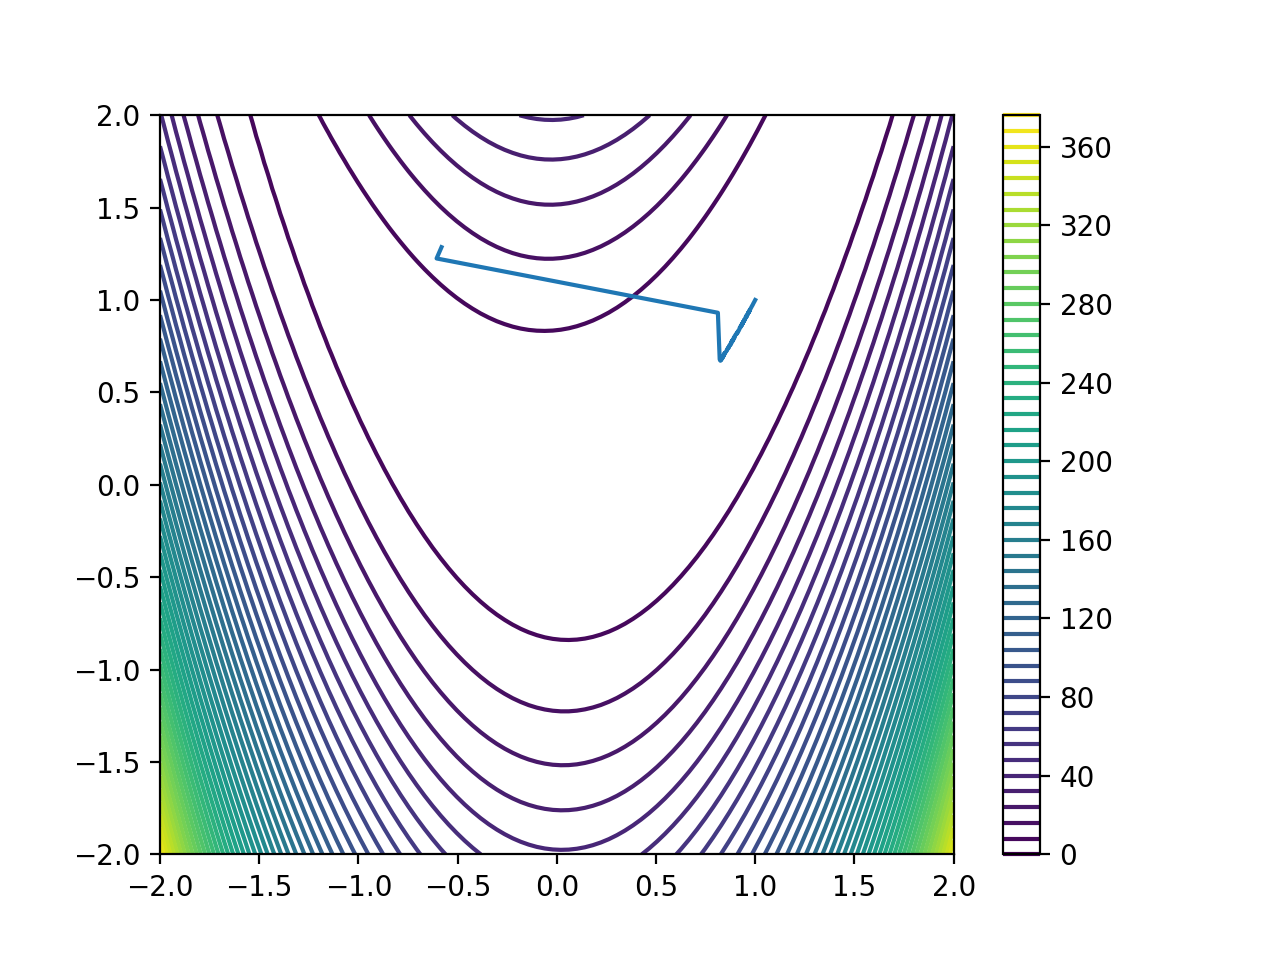

In [20]:
draw_path(RBF, path)

The SGD algorithm is less reliable when finding the minimum, as it will take multiple runs of the algorithm to correctly identify the minimum, and it would be difficult to decide if that was truly a minimum without comparing the functions output to a chart like the chart given in the homework. Because of the random variations, the SGD algorithm may not find the minimum. Below is an example of the output from an iteration that did correctly find the minimum:

func:'stochastic_gradient_descent' took: 0.1311 sec
{'x': array([0.99998919, 0.99997814]), 'evaluation': 1.1742505884880966e-10, 'count': 2494, 'path': array([[0.81789571, 0.86036247],
       [0.83876208, 0.89172472],
       [0.91120257, 0.6832021 ],
       ...,
       [0.99998908, 0.99997792],
       [0.99998921, 0.99997804],
       [0.99998919, 0.99997814]])}

### (C)

We will compare the SGD algorithm to the CG and BFGS algorithms from SciPy in order to determine which is more appropriate for this function, as measured by the number of steps taken to converge.

In [21]:
@timeit
def CG(function, start, tol):
    return scipy.optimize.minimize(function, start, method="CG")

start = np.array([-0.5, 1.5])
tol = 1e-5
CG(RBF, start, tol)

func:'CG' took: 0.0168 sec


     fun: 2.0711734599818967e-13
     jac: array([ 4.95077415e-08, -2.45421994e-08])
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 20
    njev: 44
  status: 0
 success: True
       x: array([0.99999955, 0.99999908])

In [22]:
@timeit
def BFGS(function, start, tol):
    return scipy.optimize.minimize(function, start, method="BFGS")
BFGS(RBF, start, tol)

func:'BFGS' took: 0.0220 sec


      fun: 1.6856836004019217e-13
 hess_inv: array([[0.50988602, 1.01962714],
       [1.01962714, 2.08896666]])
      jac: array([ 1.15312325e-07, -1.29424893e-08])
  message: 'Optimization terminated successfully.'
     nfev: 93
      nit: 22
     njev: 31
   status: 0
  success: True
        x: array([0.99999959, 0.99999917])

It is evident that both of these methods the correct global minimum after the first run of the algorithm. These algorithms return the same results each time because they do not include the stochastic gradient addition. These algorithms from SciPy converge to the global minimum in very few iterations when compared to SGD, on the order of one hundred times less steps.

### (D)

The BFGS algorithm and the CG algorithm implementations by SciPy will find the minimum in the same amount of steps each time and it seems to find the correct global minimum every time when starting from [-0.5, 1.5]. The SGD algorithm requires multiple runs from the same starting point to find the global minimum, but it is unclear how you would notice if that was the global minimum without having more information about the function, like a chart.

### (E)

By running each algorithm from various starting points with coordinates in the range of [-2:2, -2:2] we notice that the SciPy algorithms terminate successfully each time whereas the SGD algorithm has trouble finding the minimum at [1, 1], especially so when the starting point has x values within the range of [-2, 0]. The SGD algorithm also gets trapped in local minima and even gets trapped in points that are not a minimum; this happens when the gradient becomes so small that the iterations terminate or the maximum count of steps is reached. It seems that in general the conjugate gradient and the BFGS algorithm are more suited to minimize this particular function and do so in much less steps and seconds elapsed.

## Problem 4

### (A)

𝑓(𝑥,𝑦)=2𝑥2−1.05𝑥4+𝑥66⁄+𝑥𝑦+𝑦2 𝑥∈[−2,2],𝑦∈[−2,2]

In [23]:
def three_hump_camel(x):
    return 2*x[0]**2 - 1.05*x[0]**4 + (x[0]**6)/6 + x[0]*x[1] + x[1]**2

def three_hump_camel_grad(x):
    return np.array([4*x[0] - 4*1.05*x[0]**3 + x[0]**5 + x[1], x[0] + 2*x[1]])

In [24]:
starting_point = np.array([-1.5, -1.5])
stepsize = 0.1
tol = 1e-5

out, path = stochastic_gradient_descent(three_hump_camel, three_hump_camel_grad, starting_point, stepsize, tol)
print(out)

func:'stochastic_gradient_descent' took: 0.0072 sec
{'x': array([ 6.14698509e-07, -3.83434465e-07]), 'evaluation': 6.670339095292159e-13, 'count': 56, 'path': array([[-1.09839795e+00, -7.10868503e-01],
       [-1.18946445e+00, -1.66994153e-01],
       [-1.37457638e+00,  8.68259752e-02],
       [-1.24642417e+00,  2.71234758e-01],
       [-1.16289054e+00,  4.06136549e-01],
       [-1.22240221e+00,  5.98098177e-01],
       [-1.29994038e+00,  4.50413510e-01],
       [-1.35109416e+00,  3.79254822e-01],
       [-1.92303612e+00,  1.01708521e+00],
       [-3.57125708e-01,  7.47659149e-01],
       [-4.97242713e-01,  1.47184602e-01],
       [-1.60333098e-01, -5.51544879e-02],
       [-1.68639998e-01, -2.73047907e-02],
       [ 9.38142296e-02, -1.42000764e-01],
       [ 8.18039439e-02, -7.78247763e-03],
       [-2.63858833e-02, -6.14475766e-02],
       [ 1.77960410e-02, -7.83949206e-02],
       [ 3.80101215e-02, -5.72756724e-02],
       [ 3.20923747e-02, -6.22415967e-02],
       [ 8.89962031e-04,

<IPython.core.display.Javascript object>


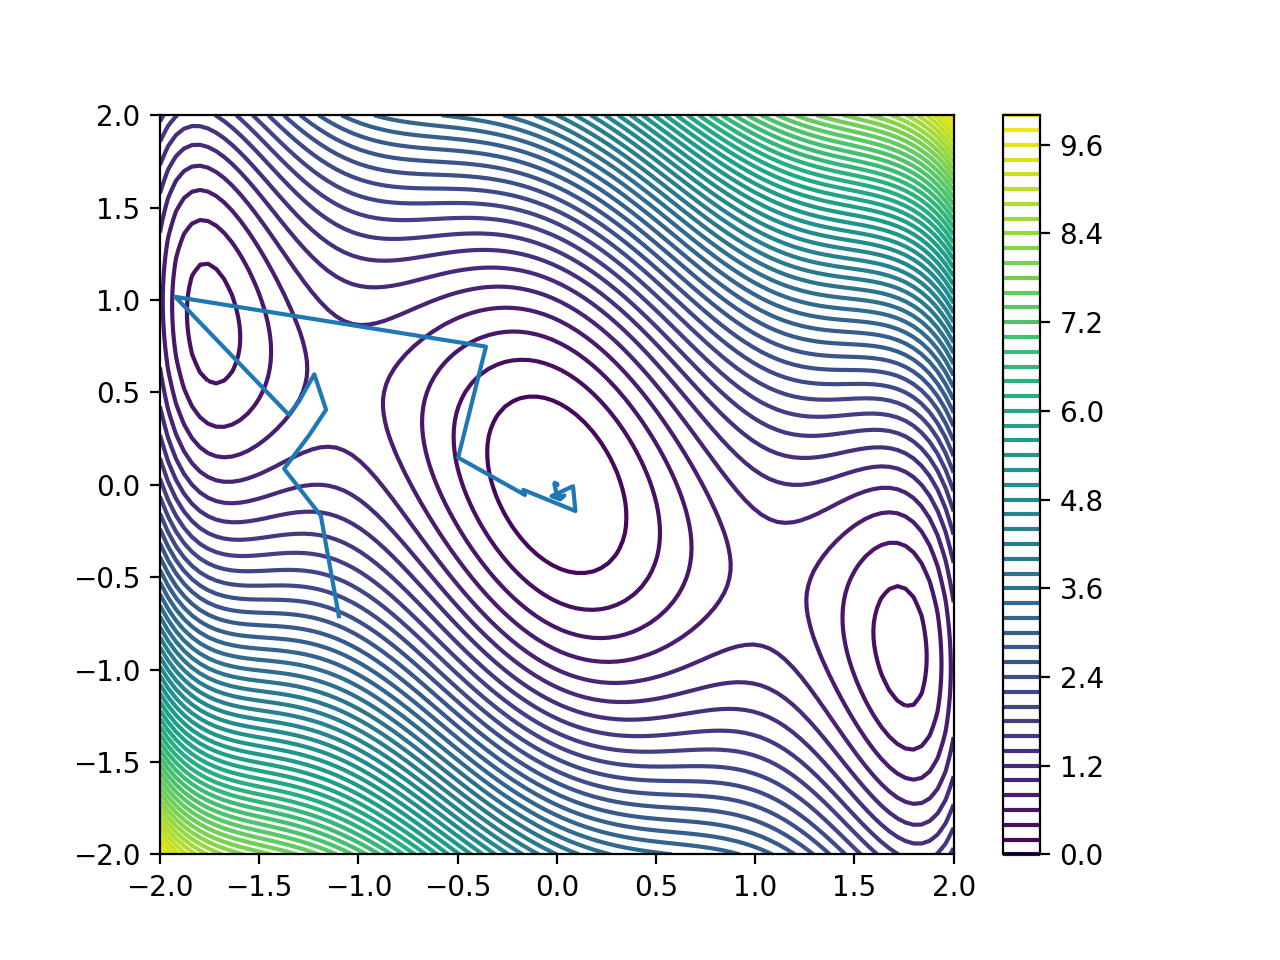

In [25]:
draw_path(three_hump_camel, path)

Starting at [-1.5, -1.5] the SGD algorithm can find one of the minima at [-1.74755152,  0.8737738 ] which evaluates to 0.298. This algorithm is not deterministic so when we run the cell again we find another minimum at [ 5.23940085e-07,  9.94325111e-07] which is close to [0, 0] and evaluates to zero. This is now the global minimum. By starting at [1.5, 1.5] the SGD algorithm finds the third minimum at  [1.74755206, -0.87377156] which evaluates to 0.298 again. This means that at [0, 0] we find the global minimum.

In [26]:
CG(three_hump_camel, starting_point, tol)

func:'CG' took: 0.0101 sec


     fun: 0.2986384422397371
     jac: array([8.40425491e-06, 7.45058060e-07])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 7
    njev: 21
  status: 0
 success: True
       x: array([-1.74755166,  0.87377619])

The CG function finds the local minimum at [-1.74, 0.87] deterministically with each run of the code, however it does so in less steps but takes more time. The SGD algorithm is faster and has the advantage of the stochasticity which allows it to find more than one minimum in subsequent runs of the code.

In [27]:
BFGS(three_hump_camel, starting_point, tol)

func:'BFGS' took: 0.0063 sec


      fun: 0.29863844223686065
 hess_inv: array([[ 0.08568628, -0.04289906],
       [-0.04289906,  0.51091221]])
      jac: array([ 1.34110451e-07, -1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([-1.74755234,  0.87377616])

In this case, starting at [-1.5, -1.5] the BFGS algorithm has similar drawbacks as the CG algorithm. It can correctly identify the local minimum with each run of the code and goes through fewer iterations than SGD but takes roughly twice as long to compute. Given these three algorithms, the standard SGD algorithm is best suited for the particular task of finding the global minimum, especially if we do not know a priori where to find the global minimum, which would allow us to choose a suitable starting point which would converge to [0, 0].

### (B)

In [28]:
@timeit
def SGDM(func,first_derivate,starting_point,stepsize,momentum=0.9,tol=1e-5,stochastic_injection=1):
    
    # evaluate the gradient at starting point
    deriv = first_derivate(starting_point);
    direction = - deriv
    count=0
    visited=[]

    while LA.norm(deriv) > tol and count < 1e5:
        if stochastic_injection>0:
            # formulate a stochastic_deriv that is the same norm as your gradient 
            rand_vec = np.array([1 - 2 * np.random.random(), 1 - 2 * np.random.random()])
            scale_factor = LA.norm(deriv) / LA.norm(rand_vec)
            stochastic_deriv = rand_vec*scale_factor
            
        else:
            stochastic_deriv=np.zeros(len(starting_point))
            
        direction=-(deriv+momentum*direction)
        
        # calculate new point position
        deriv = first_derivate(starting_point)
        new_point = starting_point + stepsize*direction
        
        if func(new_point) < func(starting_point):
            stepsize = stepsize*1.2
            starting_point = new_point
            visited.append(new_point)
            
    
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            # if stepsize is too small, clear previous direction because we already know that is not a useful direction
            if stepsize<1e-5:
                previous_direction=previous_direction-previous_direction
            else:
                # do the same as SGD here
                stepsize = stepsize*0.5
                
        count+=1
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited), "count":count}, np.asarray(visited)

In [29]:
starting_point = np.array([-1.5, -1.5])
stepsize = 0.1
tol = 1e-5

out, path =SGDM(three_hump_camel, three_hump_camel_grad, starting_point, stepsize, tol)
print(out)

func:'SGDM' took: 0.0052 sec
{'x': array([-1.74755268,  0.87377474]), 'evaluation': 0.2986384422400795, 'path': array([[-1.40812592, -1.0500045 ],
       [-1.29787702, -0.5100099 ],
       [-1.22702912, -0.00484495],
       [-1.19213083,  0.39568156],
       [-1.20555041,  0.65212281],
       [-1.28893853,  0.75184356],
       [-1.48072516,  0.72237214],
       [-1.85061925,  0.64542419],
       [-1.65242188,  0.70559639],
       [-1.69926134,  0.72115465],
       [-1.75546671,  0.7398248 ],
       [-1.74468771,  0.75263308],
       [-1.73175325,  0.76800301],
       [-1.72596336,  0.78401312],
       [-1.73226367,  0.79972065],
       [-1.74750318,  0.81492884],
       [-1.75957997,  0.83027663],
       [-1.75150271,  0.84658955],
       [-1.7452059 ,  0.85144187],
       [-1.74550595,  0.85355451],
       [-1.74586596,  0.85608969],
       [-1.74619067,  0.85884975],
       [-1.74642523,  0.8617555 ],
       [-1.74658713,  0.86470463],
       [-1.74679052,  0.86755086],
       [-1.74

<IPython.core.display.Javascript object>


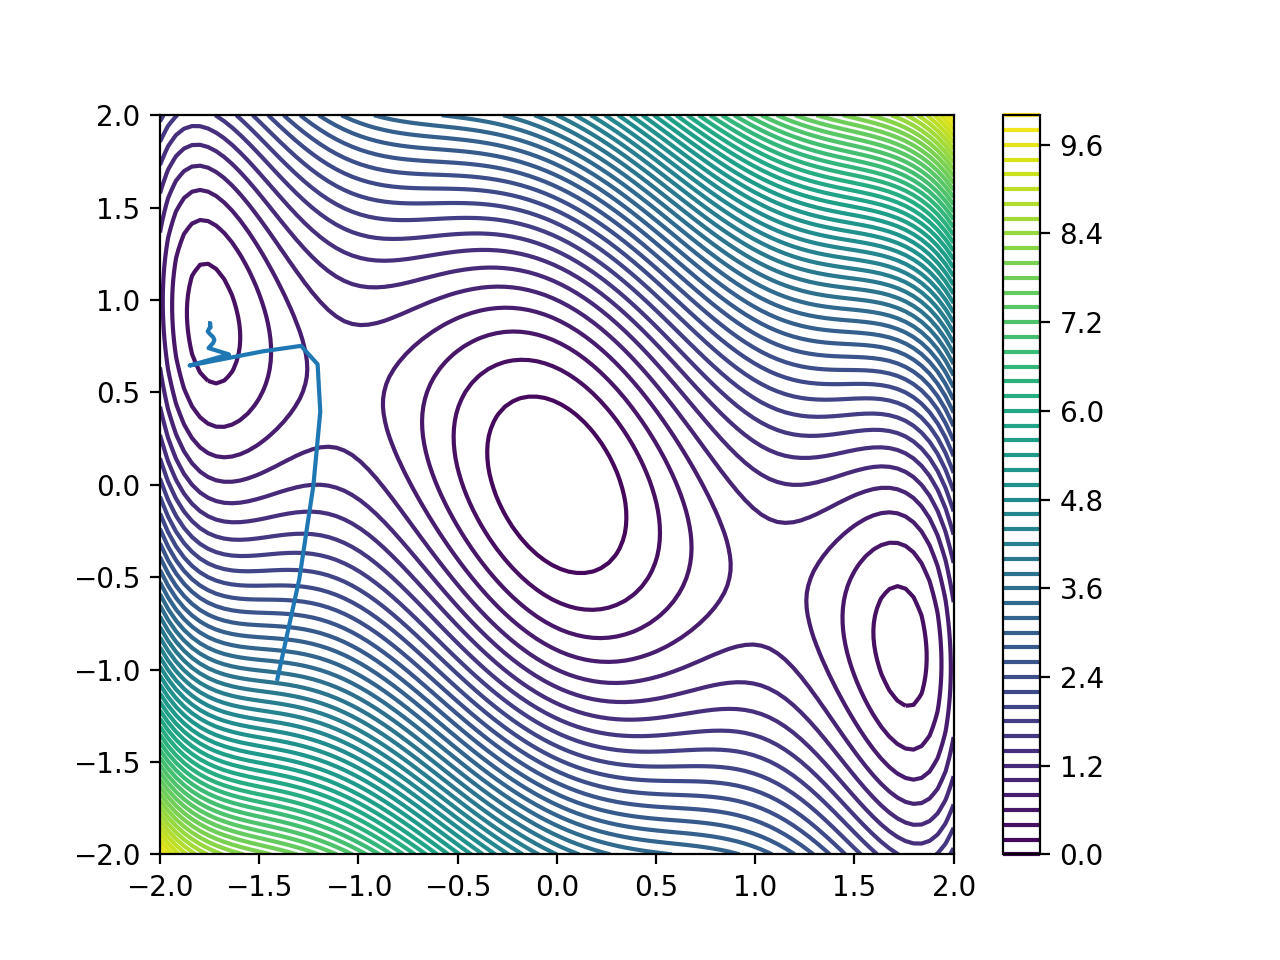

In [30]:
draw_path(three_hump_camel, path)

The SGDM algorithm does not take into account a random vector added to the current derivative and therefore is deterministic meaning that multiple runs of the algorithm from different starting points must be used before we can identify the global minimum. Compared to the CG and BFGS algorithms it takes more iterations of the main loop but is faster in terms of cpu time. It is comparable to CG and BFGS in the amount of function evaluations required during the main loop.